# 1. Import Library

In [1]:
import numpy
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


# 資料準備

In [2]:
(x_img_train,y_label_train), \
(x_img_test, y_label_test)=cifar10.load_data()

170500096/170498071 [==============================] - 65s 0us/step


In [4]:
print('train:',len(x_img_train))
print('test :',len(x_img_test))

train: 50000
test : 10000


In [5]:
x_img_train.shape

(50000, 32, 32, 3)

In [6]:
y_label_train.shape

(50000, 1)

In [7]:
x_img_test.shape

(10000, 32, 32, 3)

In [8]:
x_img_test[1]

array([[[235, 235, 235],
        [231, 231, 231],
        [232, 232, 232],
        ...,
        [233, 233, 233],
        [233, 233, 233],
        [232, 232, 232]],

       [[238, 238, 238],
        [235, 235, 235],
        [235, 235, 235],
        ...,
        [236, 236, 236],
        [236, 236, 236],
        [235, 235, 235]],

       [[237, 237, 237],
        [234, 234, 234],
        [234, 234, 234],
        ...,
        [235, 235, 235],
        [235, 235, 235],
        [234, 234, 234]],

       ...,

       [[ 87,  99,  89],
        [ 43,  51,  37],
        [ 19,  23,  11],
        ...,
        [169, 184, 179],
        [182, 197, 193],
        [188, 202, 201]],

       [[ 82,  96,  82],
        [ 46,  57,  36],
        [ 36,  44,  22],
        ...,
        [174, 189, 183],
        [185, 200, 196],
        [187, 202, 200]],

       [[ 85, 101,  83],
        [ 62,  75,  48],
        [ 58,  67,  38],
        ...,
        [168, 183, 178],
        [180, 195, 191],
        [186, 200, 199]]

In [9]:
y_label_test.shape

(10000, 1)

In [10]:
label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",
            5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}

In [18]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=15):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx],cmap='binary')
                
        title=str(i)+','+label_dict[labels[i][0]]
        if len(prediction)>0:
            title+='=>'+label_dict[prediction[i]]
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

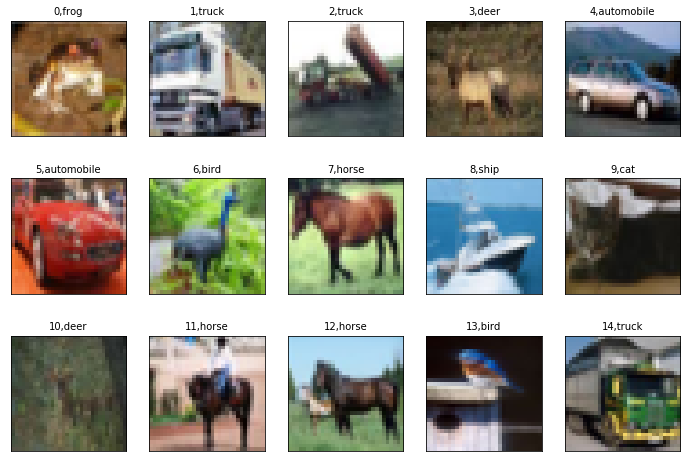

In [19]:
plot_images_labels_prediction(x_img_train,y_label_train,[],0)

In [20]:
print('x_img_test:',x_img_test.shape)
print('y_label_test :',y_label_test.shape)

x_img_test: (10000, 32, 32, 3)
y_label_test : (10000, 1)


# Image normalize 

In [22]:
x_img_train[0][1][0]

array([16, 20, 20], dtype=uint8)

In [23]:
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [25]:
x_img_train_normalize[0][1][0]

array([0.0627451 , 0.07843138, 0.07843138], dtype=float32)

# 轉換label 為OneHot Encoding

In [26]:
y_label_train.shape

(50000, 1)

In [27]:
y_label_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [18]:
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

In [19]:
y_label_train_OneHot.shape

(50000, 10)

In [20]:
y_label_train_OneHot[:5]

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])